In [1]:
import sys, os, pickle
sys.path.append('/scratch/oem214/vanilla-rtrl/')
from cluster import *
from continual_learning import *
from core import *
from dynamics import *
from functions import *
from gen_data import *
from learning_algorithms import *
from optimizers import *
from plotting import *
from wrappers import *
import matplotlib.pyplot as plt

In [3]:
task = Flip_Flop_Task(3, 0.05, input_magnitudes=None)
N_train = 20000
N_test = 5000
checkpoint_interval = 100
sigma = 0

data = task.gen_data(N_train, N_test)

n_in = task.n_in
n_hidden = 32
n_out = task.n_out
W_in  = np.random.normal(0, np.sqrt(1/(n_in)), (n_hidden, n_in))
W_rec = np.random.normal(0, np.sqrt(1/n_hidden), (n_hidden, n_hidden))
W_out = np.random.normal(0, np.sqrt(1/(n_hidden)), (n_out, n_hidden))

b_rec = np.zeros(n_hidden)
b_out = np.zeros(n_out)

alpha = 1
sigma = 0

rnn = RNN(W_in, W_rec, W_out, b_rec, b_out,
          activation=tanh,
          alpha=alpha,
          output=identity,
          loss=mean_squared_error)

learn_alg = RFLO(rnn, alpha=1, L2_reg=0.0001, L1_reg=0.0001)
optimizer = SGD_Momentum(lr=0.01, mu=0.6)

monitors = []

sim = Simulation(rnn)
sim.run(data, learn_alg=learn_alg, optimizer=optimizer,
        sigma=sigma,
        monitors=monitors,
        verbose=True,
        report_accuracy=False,
        report_loss=True,
        checkpoint_interval=checkpoint_interval)

Progress: 10.0% complete 
Time Elapsed: 0.5s 
Test loss: 0.509072525131779 

Progress: 20.0% complete 
Time Elapsed: 1.2s 
Test loss: 0.2778247784928859 

Progress: 30.0% complete 
Time Elapsed: 1.9s 
Test loss: 0.03008825832297528 

Progress: 40.0% complete 
Time Elapsed: 2.6s 
Test loss: 0.0070536768797389545 

Progress: 50.0% complete 
Time Elapsed: 3.3s 
Test loss: 0.00457133181845301 

Progress: 60.0% complete 
Time Elapsed: 3.9s 
Test loss: 0.003565934028414048 

Progress: 70.0% complete 
Time Elapsed: 4.6s 
Test loss: 0.0027103239513453716 

Progress: 80.0% complete 
Time Elapsed: 5.3s 
Test loss: 0.0025303862671671885 

Progress: 90.0% complete 
Time Elapsed: 6.0s 
Test loss: 0.002238838860912887 



In [4]:
file_name = 'KE_histograms'

In [5]:
### --- SAVE RUN --- ###
with open(os.path.join('saved_runs/', file_name), 'wb') as f:
    saved_run = {'sim': sim, 'task': task}
    pickle.dump(saved_run, f)

In [4]:
### --- OPEN RUN --- ###
with open(os.path.join('saved_runs/', file_name), 'rb') as f:
    saved_run = pickle.load(f)
    sim = saved_run['sim']
    task =saved_run['task']

In [6]:
!du -sh saved_runs/KE_histograms

2.4M	saved_runs/KE_histograms


In [7]:
topological_analysis(file_name)

rm: cannot remove '/scratch/oem214/learning-dynamics/results/analyze_KE_histograms/result_*': No such file or directory
sending incremental file list
vanilla-rtrl/
vanilla-rtrl/.DS_Store
vanilla-rtrl/.gitignore
vanilla-rtrl/README.md
vanilla-rtrl/__init__.py
vanilla-rtrl/analyze_main.py
vanilla-rtrl/compare_main.py
vanilla-rtrl/jupyter_notebook.py
vanilla-rtrl/main.py
vanilla-rtrl/main2.py
vanilla-rtrl/main_test.py
vanilla-rtrl/test.py
vanilla-rtrl/test_2.py
vanilla-rtrl/.idea/
vanilla-rtrl/.idea/misc.xml
vanilla-rtrl/.idea/modules.xml
vanilla-rtrl/.idea/vanilla-rtrl.iml
vanilla-rtrl/.idea/vcs.xml
vanilla-rtrl/.idea/workspace.xml
vanilla-rtrl/.idea/codeStyles/
vanilla-rtrl/.idea/codeStyles/codeStyleConfig.xml
vanilla-rtrl/.ipynb_checkpoints/
vanilla-rtrl/.ipynb_checkpoints/main-checkpoint.ipynb
vanilla-rtrl/.ipynb_checkpoints/test_interface-checkpoint.ipynb
vanilla-rtrl/__pycache__/
vanilla-rtrl/__pycache__/analysis.cpython-36.pyc
vanilla-rtrl/__pycache__/analysis_funcs.cpython-36.pyc


vanilla-rtrl/gen_data/__pycache__/Sensorimotor_Mapping.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/Sensorimotor_Mapping.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/Sequential_MNIST.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/Sequential_MNIST.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/Sine_Wave.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/Sine_Wave.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/Task.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/Task.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-37.pyc
vanilla-rtrl/gen_data/__pycache__/gen_data_utils.cpython-38.pyc
vanilla-rtrl/learning_algorithms/
vanilla-rtrl/learning_algorithms/DNI.py
vanilla-rtrl/learning_algorithms/Efficient_BPTT.py
vanilla-rtrl/learning_algorithms/Future_BPTT.py
vanilla-rtrl/learning_algorithms/KF_RTRL.py
vanilla-rtrl/learning_algorithms/KeRNL.py

vanilla-rtrl/core/__pycache__/Simulation.cpython-37.pyc
vanilla-rtrl/core/__pycache__/Simulation.cpython-38.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/core/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/
vanilla-rtrl/dynamics/Dynamics.py
vanilla-rtrl/dynamics/VAE.py
vanilla-rtrl/dynamics/__init__.py
vanilla-rtrl/dynamics/checkpoint_funcs.py
vanilla-rtrl/dynamics/distances.py
vanilla-rtrl/dynamics/dynamics_utils.py
vanilla-rtrl/dynamics/topology.py
vanilla-rtrl/dynamics/__pycache__/
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/Dynamics.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/VAE.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/dynamics/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/checkpoint_funcs.cpython-38.pyc
vanilla-rtrl/dynamics/__pycache__/distances.cpython-37.pyc
vanilla-rtr

vanilla-rtrl/wrappers/topological_analysis.py
vanilla-rtrl/wrappers/write_main_script.py
vanilla-rtrl/wrappers/__pycache__/
vanilla-rtrl/wrappers/__pycache__/__init__.cpython-37.pyc
vanilla-rtrl/wrappers/__pycache__/__init__.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/analyze_training_run.cpython-37.pyc
vanilla-rtrl/wrappers/__pycache__/analyze_training_run.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/compare_analyzed_checkpoints.cpython-37.pyc
vanilla-rtrl/wrappers/__pycache__/compare_analyzed_checkpoints.cpython-38.pyc
vanilla-rtrl/wrappers/__pycache__/topological_analysis.cpython-37.pyc
vanilla-rtrl/wrappers/__pycache__/topological_analysis.cpython-38.pyc

sent 1,275,704 bytes  received 6,041 bytes  2,563,490.00 bytes/sec
total size is 1,251,326  speedup is 0.98


In [3]:
###Get job status
get_ipython().system('squeue -u oem214')

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           8231556        cs  jupyter   oem214  R       1:16      1 cs026


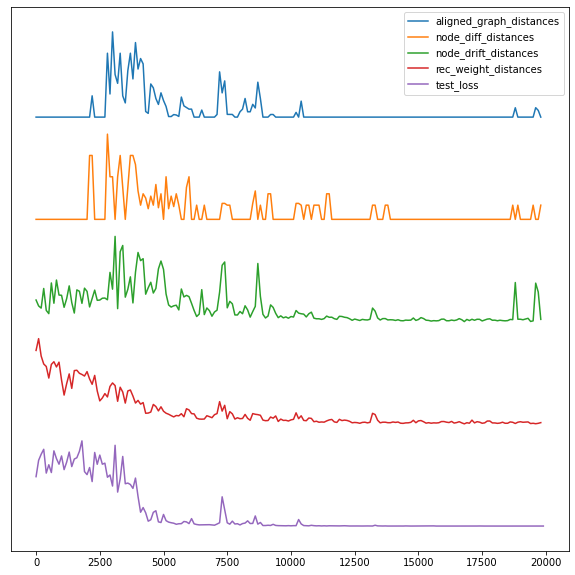

In [5]:
saved_run_name = file_name
analysis_job_name = 'analyze_{}'.format(saved_run_name)
compare_job_name = 'compare_{}'.format(saved_run_name)

results_dir = '/scratch/oem214/learning-dynamics/results/'

analysis_result_path = os.path.join(results_dir, analysis_job_name)
indices, checkpoints = unpack_analysis_results(analysis_result_path)
signals = unpack_compare_result(file_name, checkpoint_stats={'test_loss': get_checkpoint_loss})
fig = plot_signals(signals, x_values=indices)

In [ ]:
from math import ceil
all_KEs = []
for i_checkpoint in indices:
    
    checkpoint = checkpoints['checkpoint_{}'.format(i_checkpoint)]
    all_KEs.append(np.log10(checkpoint['KE']))
    
all_KEs = np.concatenate(all_KEs)

bins = np.linspace(np.amin(all_KEs), np.amax(all_KEs), 30)

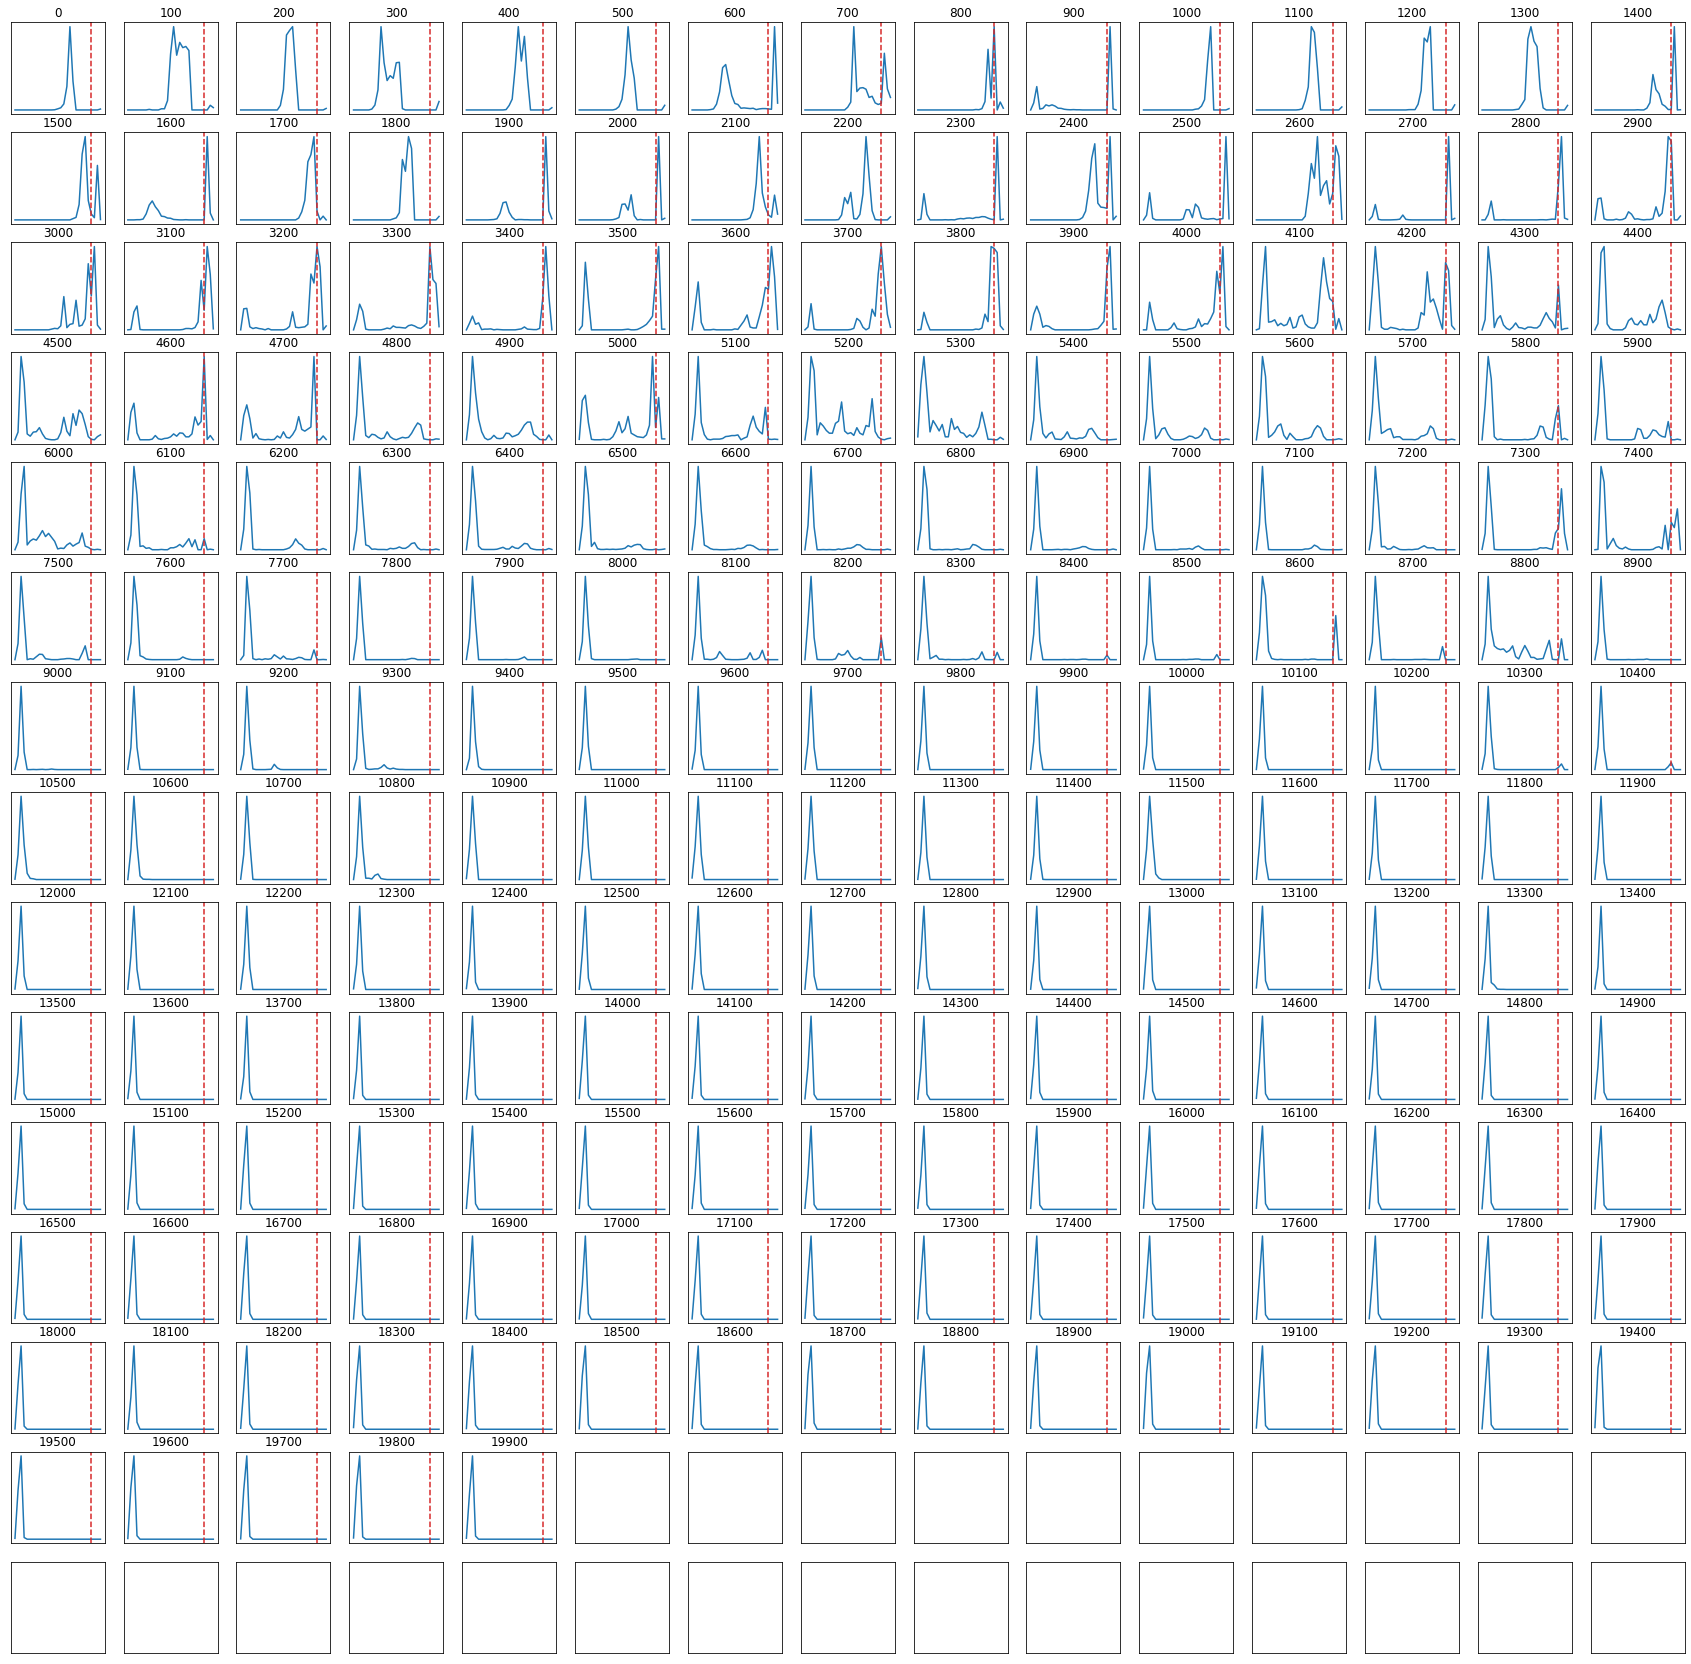

In [21]:
n_rows = ceil(np.sqrt(len(indices)))

fig, ax = plt.subplots(n_rows, n_rows, figsize=(30, 30))

for i in range(n_rows**2):
    
    i_x = i // n_rows
    i_y = i % n_rows
    
    ax[i_x, i_y].set_xticks([])
    ax[i_x, i_y].set_yticks([])
    
    try:
        i_checkpoint = indices[i]
        checkpoint = checkpoints['checkpoint_{}'.format(i_checkpoint)]
        hist, edges = np.histogram(np.log10(checkpoint['KE']), bins=bins)
        bin_width = edges[1] - edges[0]

        ax[i_x, i_y].plot(edges[:-1] + bin_width/2, hist)
        ax[i_x, i_y].axvline(x=-4, color='C3', linestyle='--')
        ax[i_x, i_y].set_title(str(i_checkpoint))
    except IndexError:
        continue

In [22]:
figs_path = 'figs/compare_algorithms/'
fig.savefig(os.path.join(figs_path, 'KE_hists.pdf'), format='pdf')

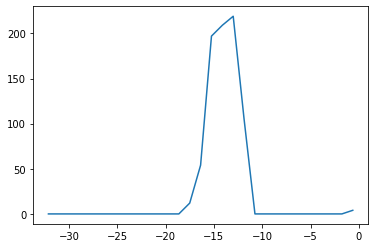

In [16]:
i_checkpoint = indices[2]
checkpoint = checkpoints['checkpoint_{}'.format(i_checkpoint)]
hist, edges = np.histogram(np.log10(checkpoint['KE']), bins=bins)
bin_width = edges[1] - edges[0]

plt.plot(edges[:-1] + bin_width/2, hist)

In [19]:
edges

array([-32.67351885, -31.54922712, -30.4249354 , -29.30064367,
       -28.17635194, -27.05206022, -25.92776849, -24.80347677,
       -23.67918504, -22.55489331, -21.43060159, -20.30630986,
       -19.18201813, -18.05772641, -16.93343468, -15.80914296,
       -14.68485123, -13.5605595 , -12.43626778, -11.31197605,
       -10.18768433,  -9.0633926 ,  -7.93910087,  -6.81480915,
        -5.69051742,  -4.5662257 ,  -3.44193397,  -2.31764224,
        -1.19335052,  -0.06905879])

In [ ]:
fig = plot_signals(signals, title='RTRL lr = 0.0001, N-KE = 1200')
figs_path = 'figs/compare_algorithms/'
#fig.savefig(os.path.join(figs_path, 'RTRL_dense_highN_2.pdf'), format='pdf')